# Distancias ponderadas para cada variable

$$D(x,y) = \sqrt{(x-y)^T\cdot A\cdot (x-y)}$$

$$ A \equiv matriz\ de\ ponderaciones $$

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests

In [2]:
session = tf.Session()

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
housing_header = ["CRIM", #      per capita crime rate by town
                  "ZN", #        proportion of residential land zoned for lots over 25,000 sq.ft.
                  "INDUS", #     proportion of non-retail business acres per town
                  "CHAS", #      Charles River dummy variable (= 1 if tract bounds  river; 0 otherwise)
                  "NOX", #       nitric oxides concentration (parts per 10 million)
                  "RM", #        average number of rooms per dwelling
                  "AGE",#        proportion of owner-occupied units built prior to 1940
                  "DIS", #       weighted distances to five Boston employment centres
                  "RAD", #       index of accessibility to radial highways
                  "TAX", #       full-value property-tax rate per $10,000
                  "PTRATIO",#    pupil-teacher ratio by town
                  "B", #         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                  "LSTAT", #     % lower status of the population
                  "MEDV" #       Median value of owner-occupied homes in $1000's
                 ]

# Decidimos las variables predictoras que vamos a usar en el modelo
cols_used = ["CRIM", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]
num_features = len(cols_used)

housing_file = requests.get(url)

housing_data = [[float(x) for x in y.split(" ") if len(x) >= 1] for y in housing_file.text.split("\n") if len(y) >= 1]

In [11]:
housing_data

[[0.00632,
  18.0,
  2.31,
  0.0,
  0.538,
  6.575,
  65.2,
  4.09,
  1.0,
  296.0,
  15.3,
  396.9,
  4.98,
  24.0],
 [0.02731,
  0.0,
  7.07,
  0.0,
  0.469,
  6.421,
  78.9,
  4.9671,
  2.0,
  242.0,
  17.8,
  396.9,
  9.14,
  21.6],
 [0.02729,
  0.0,
  7.07,
  0.0,
  0.469,
  7.185,
  61.1,
  4.9671,
  2.0,
  242.0,
  17.8,
  392.83,
  4.03,
  34.7],
 [0.03237,
  0.0,
  2.18,
  0.0,
  0.458,
  6.998,
  45.8,
  6.0622,
  3.0,
  222.0,
  18.7,
  394.63,
  2.94,
  33.4],
 [0.06905,
  0.0,
  2.18,
  0.0,
  0.458,
  7.147,
  54.2,
  6.0622,
  3.0,
  222.0,
  18.7,
  396.9,
  5.33,
  36.2],
 [0.02985,
  0.0,
  2.18,
  0.0,
  0.458,
  6.43,
  58.7,
  6.0622,
  3.0,
  222.0,
  18.7,
  394.12,
  5.21,
  28.7],
 [0.08829,
  12.5,
  7.87,
  0.0,
  0.524,
  6.012,
  66.6,
  5.5605,
  5.0,
  311.0,
  15.2,
  395.6,
  12.43,
  22.9],
 [0.14455,
  12.5,
  7.87,
  0.0,
  0.524,
  6.172,
  96.1,
  5.9505,
  5.0,
  311.0,
  15.2,
  396.9,
  19.15,
  27.1],
 [0.21124,
  12.5,
  7.87,
  0.0,
  0.524,


In [12]:
x_vals = np.array([[x for i, x in enumerate(y) if housing_header[i] in cols_used] for y in housing_data])
y_vals = np.array([[x for i, x in enumerate(y) if housing_header[i] == "MEDV"] for y in housing_data])

In [14]:
from sklearn.preprocessing import MinMaxScaler
x_vals = MinMaxScaler().fit_transform(x_vals)

In [23]:
A_diagonal = x_vals.std(axis=0) # Diagonal de la matriz, formada por la desviación estándar de cada una de las columnas
A_diagonal

array([0.09658371, 0.25123059, 0.23819571, 0.13449368, 0.28960899,
       0.19129285, 0.32131774, 0.23008566, 0.22997783, 0.19685435])

In [24]:
A= tf.cast(tf.diag(weight_diagonal), dtype=tf.float32) # Matriz diagonal con los pesos (ponderaciones)

In [25]:
session.run(A)

array([[0.09658372, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.2512306 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.23819572, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.13449368, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.289609  ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.19129285, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.32131773, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=0)

In [42]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((404, 10), (102, 10), (404, 1), (102, 1))

In [43]:
k = 4
batch_size = len(x_test)

$$D(x,y) = \sqrt{(x-y)^T\cdot A\cdot (x-y)}$$

In [44]:
x_data_train = tf.placeholder(shape=[None, num_features], dtype=tf.float32)
y_target_train = tf.placeholder(shape=[None, 1], dtype=tf.float32)

x_data_test = tf.placeholder(shape=[None, num_features], dtype=tf.float32)
y_target_test = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [45]:
subtract_term = tf.subtract(x_data_train, tf.expand_dims(x_data_test, axis=1))
first_prod = tf.matmul(subtract_term, tf.tile(tf.expand_dims(A, axis=0), [batch_size,1,1])) # A(x-y)
second_prod = tf.matmul(first_prod, tf.transpose(subtract_term, perm=[0,2,1])) 

In [46]:
distance = tf.sqrt(tf.matrix_diag_part(second_prod))

In [58]:
# Ranking

# Obtenemos los valores y los índices de los k vecinos que minimizen la distancia (por eso el 'negative')
top_k_vals, top_k_idx = tf.nn.top_k(input=tf.negative(distance), k=k)

# Obtenemos la suma de los valores de cada fila
x_sums = tf.expand_dims(tf.reduce_sum(top_k_vals, axis=1), axis=1)

# [batch_size, 1] * [1, k] = [1,1] = [1] (Dimensiones de las matrices)
x_sums_rep = tf.matmul(x_sums, tf.ones([1, k], tf.float32)) 

# Ponderaciones ==> W_i
x_vals_w = tf.expand_dims(tf.divide(top_k_vals, x_sums_rep), axis=1) 

# y_i
top_k_yvals = tf.gather(y_target_train, top_k_idx)

$$ Prediction = \sum_{i=1}^k W_i\cdot y_i $$

In [59]:
prediction = tf.squeeze(tf.matmul(x_vals_w, top_k_yvals), axis=[1])

$$ MSE = \frac{\sum_{i=1}^n y_{pred} - y_{real}}{n} $$

In [60]:
mse = tf.div(tf.reduce_sum(tf.square(tf.subtract(prediction, y_target_test))), batch_size)

In [50]:
num_loops = int(np.ceil(len(x_test)/batch_size))

for i in range(num_loops):
    min_idx = i * batch_size
    max_idx = min((i+1)*batch_size, len(x_train))
    x_batch = x_test[min_idx:max_idx]
    y_batch = y_test[min_idx:max_idx]
    
    predictions = session.run(prediction, feed_dict={x_data_train: x_train, 
                                                     x_data_test: x_batch, 
                                                     y_target_train: y_train, 
                                                     y_target_test: y_batch})
    batch_mse = session.run(mse, feed_dict={x_data_train: x_train, 
                                            x_data_test: x_batch, 
                                            y_target_train: y_train, 
                                            y_target_test: y_batch})
    
    print("MSE = {}".format(batch_mse))

MSE = 32.396942138671875


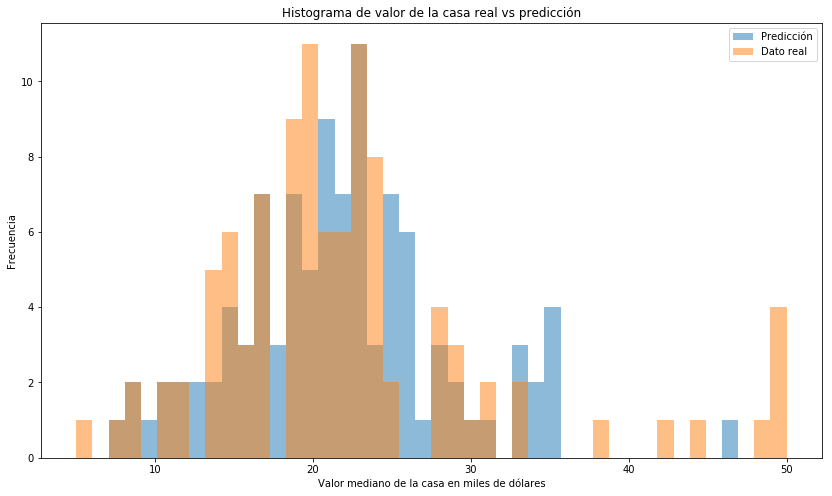

In [52]:
bins = np.linspace(5, 50, 45)
plt.figure(figsize=(14,8))
plt.hist(predictions, bins=bins, alpha=0.5, label="Predicción")
plt.hist(y_batch, bins=bins, alpha=0.5, label="Dato real")
plt.title("Histograma de valor de la casa real vs predicción")
plt.xlabel("Valor mediano de la casa en miles de dólares")
plt.ylabel("Frecuencia")
plt.legend(loc="upper right")
plt.show()

In [53]:
def knn(k):
    batch_size = len(x_test)
    top_k_xvals, top_k_idx = tf.nn.top_k(tf.negative(distance), k=k)
    
    # Sumo las distancias de los k puntos más cercanos
    x_sums = tf.expand_dims(tf.reduce_sum(top_k_xvals, axis=1), 1)
    # Repito esa suma k veces
    x_sums_repeated = tf.matmul(x_sums, tf.ones([1, k], tf.float32))
    # Pesos ponderados
    x_vals_weighted = tf.expand_dims(tf.divide(top_k_xvals, x_sums_repeated), 1) # w_i = d_i / (\sum(d_j))
    
    top_k_yvals = tf.gather(y_target_train, top_k_idx)
    prediction = tf.squeeze(tf.matmul(x_vals_weighted, top_k_yvals), axis=[1]) # \sum w_i y_i
    
    mse = tf.divide(tf.reduce_sum(tf.square(tf.subtract(prediction, y_target_test))), batch_size)
    
    min_idx = i * batch_size
    max_idx = min((i+1)*batch_size, len(x_train))
    x_batch = x_test[min_idx:max_idx]
    y_batch = y_test[min_idx:max_idx]
    
    predictions = session.run(prediction, feed_dict={x_data_train: x_train, 
                                                     x_data_test: x_batch, 
                                                     y_target_train: y_train, 
                                                     y_target_test: y_batch})
    batch_mse = session.run(mse, feed_dict={x_data_train: x_train, 
                                            x_data_test: x_batch, 
                                            y_target_train: y_train, 
                                            y_target_test: y_batch})
        
    return batch_mse

MSE: 25.376867294311523
MSE: 28.88414764404297
MSE: 32.396942138671875
MSE: 36.93500518798828
MSE: 38.589447021484375
MSE: 42.118709564208984
MSE: 44.00992202758789
MSE: 45.67893600463867
MSE: 44.446746826171875
MSE: 45.93720626831055
MSE: 48.191192626953125
MSE: 48.38208770751953
MSE: 49.48128890991211
MSE: 49.63360595703125
MSE: 48.446983337402344
MSE: 49.37443542480469
MSE: 49.64814758300781
MSE: 50.737030029296875
MSE: 50.99749755859375
MSE: 51.45245361328125
MSE: 52.502891540527344
MSE: 53.33485794067383
MSE: 53.28687286376953
MSE: 52.79092025756836
MSE: 53.16289520263672
MSE: 53.82308578491211
MSE: 53.62741470336914
MSE: 53.33652877807617


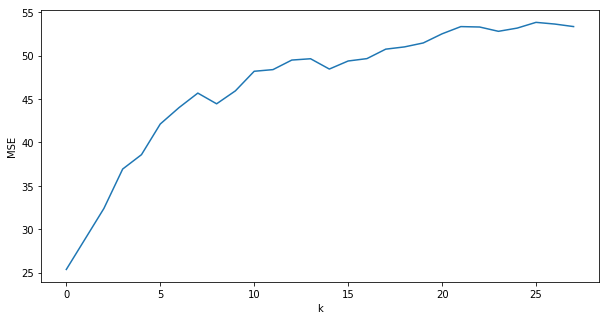

In [54]:
# TÉCNICA DEL CODO

mse_k = []

for k in range(2, 30):
    mse_k.append(knn(k))
    print("MSE: {}".format(knn(k)))
    
plt.figure(figsize=(10,5))
plt.plot(mse_k)
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()